In [1]:
import time
inicio = time.time()

# Carga de Paquetes y Librerias

In [2]:
# Basic packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
from pandas.plotting import scatter_matrix
from tabulate import tabulate
from numpy import array
import datetime as dt           # Permite trabajar con fechas

# Machine learning packages
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline


# Reducción de dimensiones
from sklearn.decomposition import PCA

# Regresión lineal
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Métricas de rendimiento
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score, mean_absolute_percentage_error
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from scipy.stats import bartlett

# TensorFlow ≥2.0-preview is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Pretty print
from pprint import pprint

#SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

#Google
from google.colab import files  # Permite descargar archivos directamente desde Colab


In [3]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [4]:
def TrainingSets(data, dataξ,step_back):
    train_data  = data.copy()
    train_dataξ = dataξ.copy()
    # training set
    X_train, ξ_train = [], []
    for i in range(len(train_data)-step_back - 1):
        a = train_data[i:(i+step_back)]
        X_train.append(a)
        ξ_train.append(train_dataξ[i + step_back])
    X_train = np.array(X_train); ξ_train = np.array(ξ_train);
    return  X_train, ξ_train

# Carga de Base de Datos

In [5]:
#cargar datos desde drive acceso libre
FILEID = "1feevcPPLWwZS2_ixxgKUoVi25NJQ0uJ_"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O Departamentos.zip && rm -rf /tmp/cookies.txt
!unzip Departamentos.zip
!dir

--2023-07-22 01:22:40--  https://docs.google.com/uc?export=download&confirm=&id=1feevcPPLWwZS2_ixxgKUoVi25NJQ0uJ_
Resolving docs.google.com (docs.google.com)... 173.194.203.100, 173.194.203.113, 173.194.203.138, ...
Connecting to docs.google.com (docs.google.com)|173.194.203.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rp15lobi20aubkjtod2jjqfri98bndrt/1689988950000/15940467605774616319/*/1feevcPPLWwZS2_ixxgKUoVi25NJQ0uJ_?e=download&uuid=4858ffc9-d7ae-48ab-98d1-0e6fce2ea90f [following]
--2023-07-22 01:22:46--  https://doc-0c-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rp15lobi20aubkjtod2jjqfri98bndrt/1689988950000/15940467605774616319/*/1feevcPPLWwZS2_ixxgKUoVi25NJQ0uJ_?e=download&uuid=4858ffc9-d7ae-48ab-98d1-0e6fce2ea90f
Resolving doc-0c-6k-docs.googleusercontent.com (doc-0c-6k-docs.googleusercontent.com)... 173.194.203.1

In [6]:
ls

Demanda_Arreglo_LSTM_Rd_CL.xlsx   Demanda_Arreglo_Mean.xlsx
Demanda_Arreglo_LSTM_Rd_Sin.xlsx  Departamentos.zip
Demanda_Arreglo_LSTM_Rd.xlsx      sample_data/


In [7]:
df=pd.read_excel('/content/Demanda_Arreglo_Mean.xlsx')
df.fillna(df.mean(), inplace=True)

In [8]:
df = df.drop('Date', axis=1)
# Se establese nuevamente en el indice temporal en la nueva variable 'a', y al DataFrame se incliye la informacion de frecuencia horaria 'H' de la base de datos
date_rng = pd.date_range(start='2020-10-01', end='2023-01-01', freq='H')
# Establece el índice del DataFrame a las fechas generadas
df.set_index(date_rng[0:-1], inplace=True)

<Axes: title={'center': 'Demanda Energia Horaria en Colombia kWh'}, xlabel='Fecha', ylabel='kWh'>

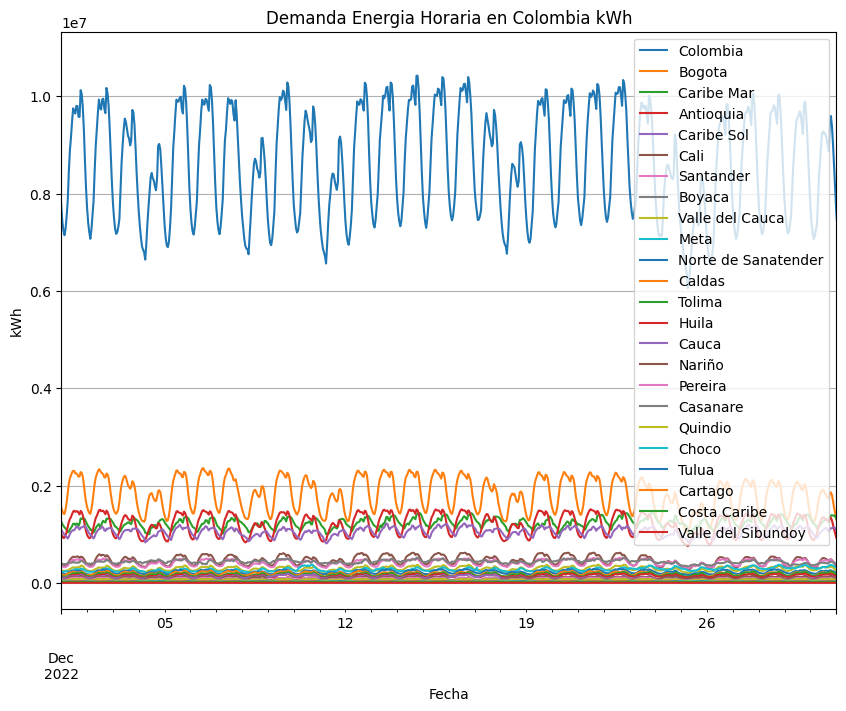

In [9]:
df.plot(kind='line',figsize=(10,7.5),title='Demanda Energia Horaria en Colombia kWh', grid=True, ylabel='kWh', xlabel='Fecha',xlim=('2022-12-01','2022-12-31'))

# Normalizacion


In [10]:
df1=df.copy()

In [11]:
#scaler = StandardScaler()
scaler = MinMaxScaler()
scaler.fit(df1)
df1=scaler.transform(df1)
#plt.plot(df1)

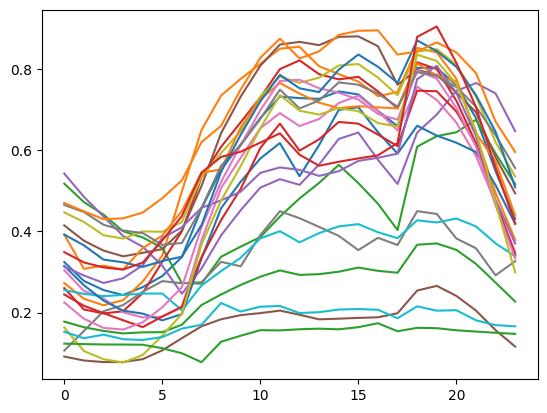

In [12]:
plt.plot(df1[0:24,:])
plt.show()

In [13]:
Ts1=df1.copy()
out=Ts1[:,0]
print('Tamaño Serie Horaria: ', Ts1.shape)
print('Tamaño Serie Salida: ', out.shape)

Tamaño Serie Horaria:  (19728, 24)
Tamaño Serie Salida:  (19728,)


# Modelos DL


## TimeStep = 06

### Conjunto de Entrenamiento


In [16]:
#  Particion X,Y y Time_step/step_back/window
step_back = 6

X1, Y1 = TrainingSets(data = Ts1, dataξ = out,step_back=step_back)


#  Particion Train_Test

Part = 0.8

# Serie 1
X_test1 = X1[int(len(X1)*0.8):]
X_train1 = X1[:int(len(X1)*0.8)]
# X_test1=X_test1[:,0,:]
# X_train1=X_train1[:,0,:]

Y_test1 = Y1[int(len(Y1)*0.8):]
Y_train1 = Y1[:int(len(Y1)*0.8)]
# Y_test1=Y_test1[:,0]
# Y_train1=Y_train1[:,0]



In [17]:
# Nuemero de Epocas
N=100
bsz=512

In [18]:
callbacks = [keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_loss"),
             keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, min_lr=0.0001),
             keras.callbacks.EarlyStopping(monitor="val_loss", patience=7, verbose=1),]

### LSTM

In [19]:
model_LSTM = keras.models.Sequential([
                                     keras.layers.LSTM(100, return_sequences=True, input_shape=[step_back,Ts1.shape[1]]),
                                     keras.layers.LSTM(100, return_sequences=True),
                                     keras.layers.LSTM(100, return_sequences=True),
                                     keras.layers.LSTM(1)
])
model_LSTM.summary()

# Training

model_LSTM.compile(loss="mse", optimizer="adam", metrics=['mae', 'mse'])
history = model_LSTM.fit(X_train1, Y_train1, epochs=N, batch_size=bsz, callbacks=callbacks, validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 6, 100)            50000     
                                                                 
 lstm_5 (LSTM)               (None, 6, 100)            80400     
                                                                 
 lstm_6 (LSTM)               (None, 6, 100)            80400     
                                                                 
 lstm_7 (LSTM)               (None, 1)                 408       
                                                                 
Total params: 211,208
Trainable params: 211,208
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 14s 65ms/step - loss: 0.0751 - mae: 0.2213 - mse: 0.0751 - val_loss: 0.0346 - val_mae: 0.1651 - val_mse: 0.0346 - lr: 0.0010
Ep

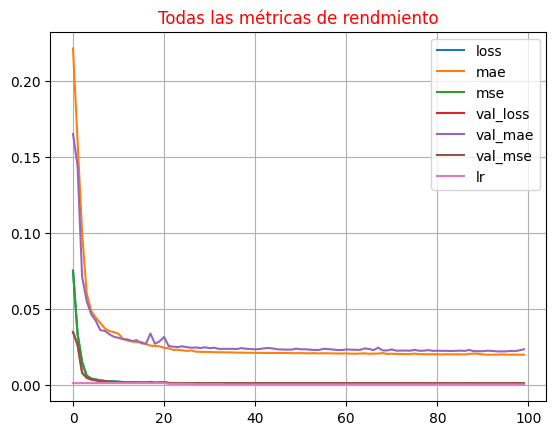

In [20]:
hpd = pd.DataFrame(history.history)
hpd.plot()
plt.title('Todas las métricas de rendmiento', c='r')
plt.grid(True)
plt.show()

### ANN

In [21]:
model_ANN = keras.models.Sequential([
                                     keras.layers.Dense(100, input_shape=(step_back,Ts1.shape[1],)),
                                     keras.layers.Dense(100),
                                     keras.layers.Dense(100),
                                     keras.layers.Dense(1)
])
model_ANN.summary()

# Training

model_ANN.compile(loss="mse", optimizer="adam", metrics=['mae', 'mse'])
history = model_ANN.fit(X_train1, Y_train1, epochs=N, batch_size=bsz,callbacks=callbacks, validation_split=0.2) #

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6, 100)            2500      
                                                                 
 dense_1 (Dense)             (None, 6, 100)            10100     
                                                                 
 dense_2 (Dense)             (None, 6, 100)            10100     
                                                                 
 dense_3 (Dense)             (None, 6, 1)              101       
                                                                 
Total params: 22,801
Trainable params: 22,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 3s 15ms/step - loss: 0.1710 - mae: 0.3200 - mse: 0.1710 - val_loss: 0.0770 - val_mae: 0.2291 - val_mse: 0.0770 - lr: 0.0010
Epoch

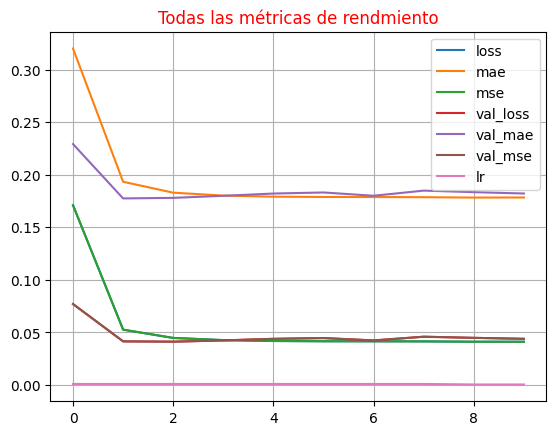

In [22]:
hpd = pd.DataFrame(history.history)
hpd.plot()
plt.title('Todas las métricas de rendmiento', c='r')
plt.grid(True)
plt.show()

### GRU

In [23]:
model_GRU = keras.models.Sequential([
                                     keras.layers.GRU(100, return_sequences=True, input_shape=[step_back,Ts1.shape[1]]),
                                     keras.layers.GRU(100, return_sequences=True),
                                     keras.layers.GRU(100, return_sequences=True),
                                     keras.layers.GRU(1)
])
model_GRU.summary()

# Training
metrics=['mae', 'mse']

model_GRU.compile(loss="mse", optimizer="adam", metrics=metrics)
history = model_GRU.fit(X_train1, Y_train1, epochs=N, batch_size=bsz, callbacks=callbacks, validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 6, 100)            37800     
                                                                 
 gru_1 (GRU)                 (None, 6, 100)            60600     
                                                                 
 gru_2 (GRU)                 (None, 6, 100)            60600     
                                                                 
 gru_3 (GRU)                 (None, 1)                 309       
                                                                 
Total params: 159,309
Trainable params: 159,309
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 7s 58ms/step - loss: 0.0623 - mae: 0.1954 - mse: 0.0623 - val_loss: 0.0274 - val_mae: 0.1423 - val_mse: 0.0274 - lr: 0.0010
Epo

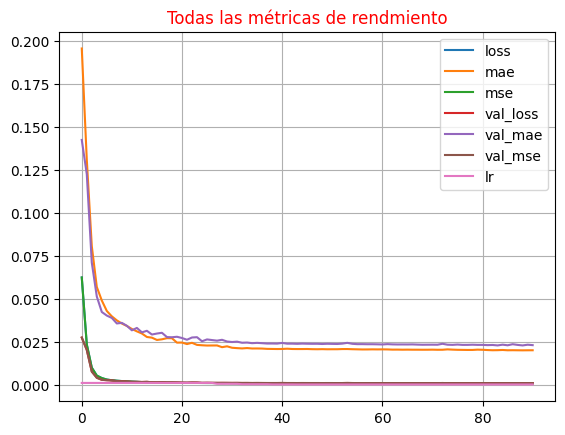

In [24]:
hpd = pd.DataFrame(history.history)
hpd.plot()
plt.title('Todas las métricas de rendmiento', c='r')
plt.grid(True)
plt.show()

### RNN

In [25]:
model_RNN = keras.models.Sequential([
                                     keras.layers.SimpleRNN(100, return_sequences=True, input_shape=[step_back,Ts1.shape[1]]),
                                     keras.layers.SimpleRNN(100, return_sequences=True),
                                     keras.layers.SimpleRNN(100, return_sequences=True),
                                     keras.layers.SimpleRNN(1)
])
model_RNN.summary()

# Training

metrics=['mae', 'mse']
model_RNN.compile(loss="mse", optimizer="adam", metrics=metrics)
history = model_RNN.fit(X_train1, Y_train1, epochs=N, batch_size=bsz, callbacks=callbacks, validation_split=0.2)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 6, 100)            12500     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 6, 100)            20100     
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 6, 100)            20100     
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 1)                 102       
                                                                 
Total params: 52,802
Trainable params: 52,802
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 5s 45ms/step - loss: 0.3077 - mae: 0.4797 - mse: 0.3077 - val_loss: 0.1865 - val_mae: 0.3853 - val_mse: 0.1865 - lr: 0.0010
Epoch

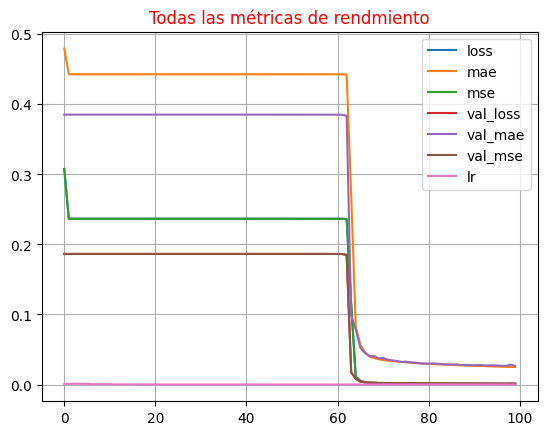

In [26]:
hpd = pd.DataFrame(history.history)
hpd.plot()
plt.title('Todas las métricas de rendmiento', c='r')
plt.grid(True)
plt.show()

# Rendimiento

124/124 [==============================] - 0s 2ms/step


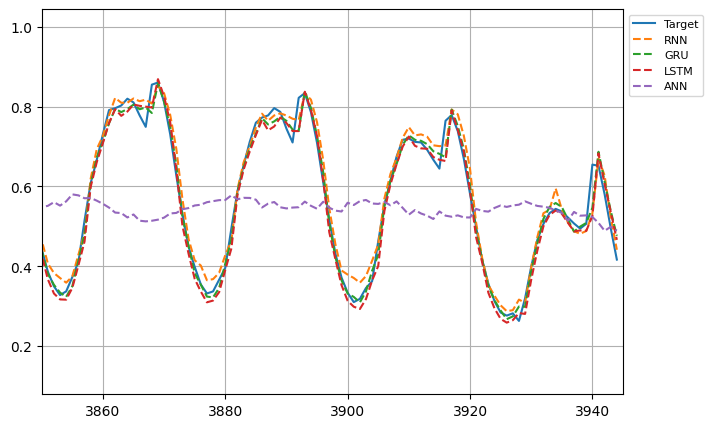

╒═════════════╤════════════╤═════════════╤═════════════╤═══════════════╕
│ Metrics     │        RNN │         GRU │        LSTM │           ANN │
╞═════════════╪════════════╪═════════════╪═════════════╪═══════════════╡
│ MSE         │ 0.03836    │ 0.03191     │ 0.03146     │  0.22295      │
├─────────────┼────────────┼─────────────┼─────────────┼───────────────┤
│ RMSE        │ 0.00147124 │ 0.00101799  │ 0.000989835 │  0.049706     │
├─────────────┼────────────┼─────────────┼─────────────┼───────────────┤
│ MAE         │ 0.03044    │ 0.02436     │ 0.02391     │  0.19348      │
├─────────────┼────────────┼─────────────┼─────────────┼───────────────┤
│ R2          │ 0.9635     │ 0.97475     │ 0.97544     │ -0.2331       │
├─────────────┼────────────┼─────────────┼─────────────┼───────────────┤
│ cnSMAPE     │ 0.94565    │ 0.95961     │ 0.9603      │  0.66878      │
├─────────────┼────────────┼─────────────┼─────────────┼───────────────┤
│ P_Value_PS  │ 0          │ 0           │ 0       

In [46]:
forecasting_RNN  = model_RNN.predict(X_test1)
forecasting_GRU  = model_GRU.predict(X_test1)
forecasting_LSTM = model_LSTM.predict(X_test1)
forecasting_ANN = model_ANN.predict(X_test1)

forecasting_DL2 = [forecasting_RNN, forecasting_GRU, forecasting_LSTM,forecasting_ANN[:,0,0]]
model_names_DL = ['RNN', 'GRU', 'LSTM','ANN']

plt.figure(figsize=(7.5,5))
plt.plot(Y_test1, label='Target')
for i in range(len(forecasting_DL2)):
  plt.plot(forecasting_DL2[i], label=model_names_DL[i], linestyle='--')
plt.xlim(3850,len(forecasting_DL2[i])) # 3850
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='8')
plt.grid()
plt.show()

col_names, MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var = ['Metrics','RNN', 'GRU', 'LSTM','ANN'], ["MSE"], ["RMSE"], ["MAE"], ["R2"],['cnSMAPE'],['P_Value_PS'],['P_Value_TT'], ['P_Value_Var']
for k in range(4):
  MSE.append(round(mean_squared_error(Y_test1, forecasting_DL2[k], squared=False),5))
  RMSE.append(mean_squared_error(Y_test1, forecasting_DL2[k], squared=True))
  MAE.append(round(mean_absolute_error(Y_test1, forecasting_DL2[k]),5))
  R2.append(round(r2_score(Y_test1, forecasting_DL2[k]),5))
  mape=mean_absolute_percentage_error(Y_test1, forecasting_DL2[k])
  smape = 2 * mape * 100 / (100 - mape)
  cnSMAPE.append(round(1-(smape/2),5))
  correlation, p_value = stats.pearsonr(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
  P_Value_PS.append(p_value)
  correlation, p_value = stats.ttest_ind(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
  P_Value_TT.append(p_value)
  statistic, p_value3 = bartlett(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
  P_Value_Var.append(p_value3)

tablas = [MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var]

print(tabulate(tablas, headers=col_names, tablefmt="fancy_grid"))




124/124 [==============================] - 0s 4ms/step


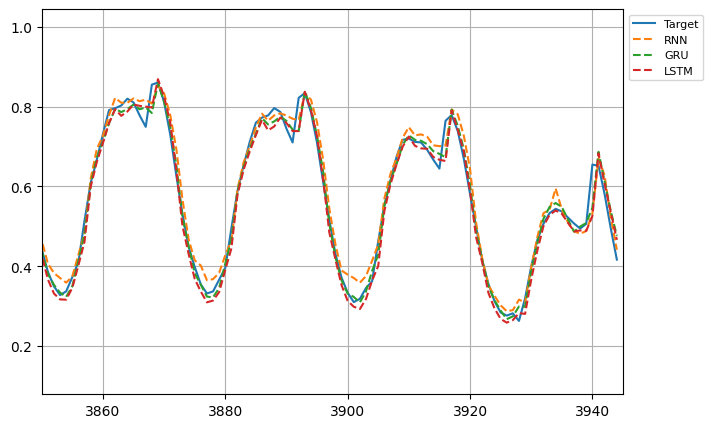

╒═════════════╤════════════╤═════════════╤═════════════╕
│ Metrics     │        RNN │         GRU │        LSTM │
╞═════════════╪════════════╪═════════════╪═════════════╡
│ MSE         │ 0.03836    │ 0.03191     │ 0.03146     │
├─────────────┼────────────┼─────────────┼─────────────┤
│ RMSE        │ 0.00147124 │ 0.00101799  │ 0.000989835 │
├─────────────┼────────────┼─────────────┼─────────────┤
│ MAE         │ 0.03044    │ 0.02436     │ 0.02391     │
├─────────────┼────────────┼─────────────┼─────────────┤
│ R2          │ 0.9635     │ 0.97475     │ 0.97544     │
├─────────────┼────────────┼─────────────┼─────────────┤
│ cnSMAPE     │ 0.94565    │ 0.95961     │ 0.9603      │
├─────────────┼────────────┼─────────────┼─────────────┤
│ P_Value_PS  │ 0          │ 0           │ 0           │
├─────────────┼────────────┼─────────────┼─────────────┤
│ P_Value_TT  │ 0.868433   │ 0.2603      │ 0.031706    │
├─────────────┼────────────┼─────────────┼─────────────┤
│ P_Value_Var │ 1.1822e-09 │ 0.

In [47]:
forecasting_RNN  = model_RNN.predict(X_test1)
forecasting_GRU  = model_GRU.predict(X_test1)
forecasting_LSTM = model_LSTM.predict(X_test1)

forecasting_DL2 = [forecasting_RNN, forecasting_GRU, forecasting_LSTM]
model_names_DL = ['RNN', 'GRU', 'LSTM']

plt.figure(figsize=(7.5,5))
plt.plot(Y_test1, label='Target')
for i in range(len(forecasting_DL2)):
  plt.plot(forecasting_DL2[i], label=model_names_DL[i], linestyle='--')
plt.xlim(3850,len(forecasting_DL2[i])) # 3850
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='8')
plt.grid()
plt.show()

col_names, MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var = ['Metrics','RNN', 'GRU', 'LSTM'], ["MSE"], ["RMSE"], ["MAE"], ["R2"],['cnSMAPE'],['P_Value_PS'],['P_Value_TT'], ['P_Value_Var']
for k in range(3):
  MSE.append(round(mean_squared_error(Y_test1, forecasting_DL2[k], squared=False),5))
  RMSE.append(mean_squared_error(Y_test1, forecasting_DL2[k], squared=True))
  MAE.append(round(mean_absolute_error(Y_test1, forecasting_DL2[k]),5))
  R2.append(round(r2_score(Y_test1, forecasting_DL2[k]),5))
  mape=mean_absolute_percentage_error(Y_test1, forecasting_DL2[k])
  smape = 2 * mape * 100 / (100 - mape)
  cnSMAPE.append(round(1-(smape/2),5))
  correlation, p_value = stats.pearsonr(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
  P_Value_PS.append(p_value)
  correlation, p_value = stats.ttest_ind(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
  P_Value_TT.append(p_value)
  statistic, p_value3 = bartlett(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
  P_Value_Var.append(p_value3)

tablas = [MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var]

print(tabulate(tablas, headers=col_names, tablefmt="fancy_grid"))



In [49]:
tablas=pd.DataFrame(tablas)
tablas.to_excel("/content/DL_M_6.xlsx")
files.download("/content/DL_M_6.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# TimeStep =12

### Conjunto de Entrenamiento


In [50]:
#  Particion X,Y y Time_step/step_back/window
step_back = 12

X1, Y1 = TrainingSets(data = Ts1, dataξ = out,step_back=step_back)


#  Particion Train_Test

Part = 0.8

# Serie 1
X_test1 = X1[int(len(X1)*0.8):]
X_train1 = X1[:int(len(X1)*0.8)]
# X_test1=X_test1[:,0,:]
# X_train1=X_train1[:,0,:]

Y_test1 = Y1[int(len(Y1)*0.8):]
Y_train1 = Y1[:int(len(Y1)*0.8)]
# Y_test1=Y_test1[:,0]
# Y_train1=Y_train1[:,0]

### LSTM

In [51]:
model_LSTM = keras.models.Sequential([
                                     keras.layers.LSTM(100, return_sequences=True, input_shape=[step_back,Ts1.shape[1]]),
                                     keras.layers.LSTM(100, return_sequences=True),
                                     keras.layers.LSTM(100, return_sequences=True),
                                     keras.layers.LSTM(1)
])
model_LSTM.summary()

# Training

model_LSTM.compile(loss="mse", optimizer="adam", metrics=['mae', 'mse'])
history = model_LSTM.fit(X_train1, Y_train1, epochs=N, batch_size=bsz, callbacks=callbacks, validation_split=0.2)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 12, 100)           50000     
                                                                 
 lstm_9 (LSTM)               (None, 12, 100)           80400     
                                                                 
 lstm_10 (LSTM)              (None, 12, 100)           80400     
                                                                 
 lstm_11 (LSTM)              (None, 1)                 408       
                                                                 
Total params: 211,208
Trainable params: 211,208
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 8s 67ms/step - loss: 0.0646 - mae: 0.2077 - mse: 0.0646 - val_loss: 0.0447 - val_mae: 0.1806 - val_mse: 0.0447 - lr: 0.0010
Epo

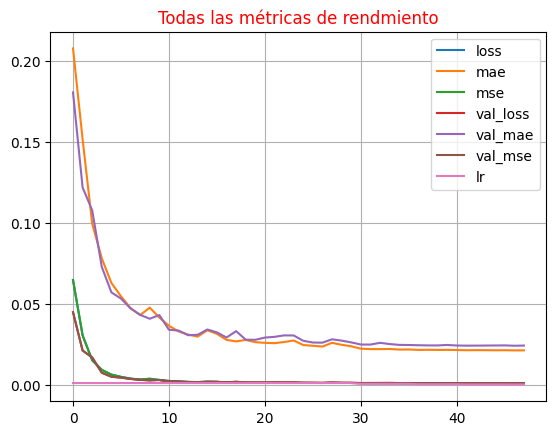

In [52]:
hpd = pd.DataFrame(history.history)
hpd.plot()
plt.title('Todas las métricas de rendmiento', c='r')
plt.grid(True)
plt.show()

### ANN

In [53]:
model_ANN = keras.models.Sequential([
                                     keras.layers.Dense(100, input_shape=(step_back,Ts1.shape[1],)),
                                     keras.layers.Dense(100),
                                     keras.layers.Dense(100),
                                     keras.layers.Dense(1)
])
model_ANN.summary()

# Training

model_ANN.compile(loss="mse", optimizer="adam", metrics=['mae', 'mse'])
history = model_ANN.fit(X_train1, Y_train1, epochs=N, batch_size=bsz,callbacks=callbacks, validation_split=0.2) #

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 12, 100)           2500      
                                                                 
 dense_5 (Dense)             (None, 12, 100)           10100     
                                                                 
 dense_6 (Dense)             (None, 12, 100)           10100     
                                                                 
 dense_7 (Dense)             (None, 12, 1)             101       
                                                                 
Total params: 22,801
Trainable params: 22,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 2s 18ms/step - loss: 0.0743 - mae: 0.2226 - mse: 0.0743 - val_loss: 0.0411 - val_mae: 0.1761 - val_mse: 0.0411 - lr: 0.0010
Epoch

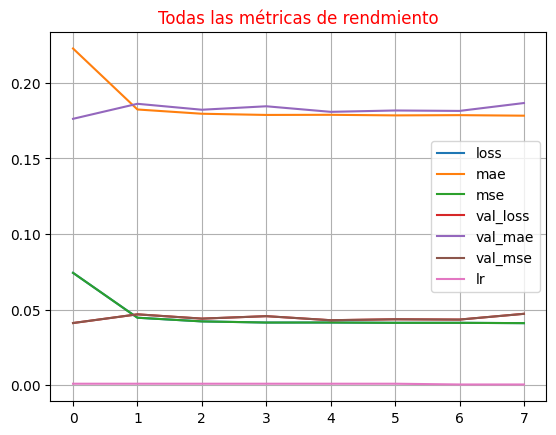

In [54]:
hpd = pd.DataFrame(history.history)
hpd.plot()
plt.title('Todas las métricas de rendmiento', c='r')
plt.grid(True)
plt.show()

### GRU

In [55]:
model_GRU = keras.models.Sequential([
                                     keras.layers.GRU(100, return_sequences=True, input_shape=[step_back,Ts1.shape[1]]),
                                     keras.layers.GRU(100, return_sequences=True),
                                     keras.layers.GRU(100, return_sequences=True),
                                     keras.layers.GRU(1)
])
model_GRU.summary()

# Training
metrics=['mae', 'mse']

model_GRU.compile(loss="mse", optimizer="adam", metrics=metrics)
history = model_GRU.fit(X_train1, Y_train1, epochs=N, batch_size=bsz, callbacks=callbacks, validation_split=0.2)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 12, 100)           37800     
                                                                 
 gru_5 (GRU)                 (None, 12, 100)           60600     
                                                                 
 gru_6 (GRU)                 (None, 12, 100)           60600     
                                                                 
 gru_7 (GRU)                 (None, 1)                 309       
                                                                 
Total params: 159,309
Trainable params: 159,309
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 8s 58ms/step - loss: 0.0486 - mae: 0.1727 - mse: 0.0486 - val_loss: 0.0275 - val_mae: 0.1391 - val_mse: 0.0275 - lr: 0.0010
Epo

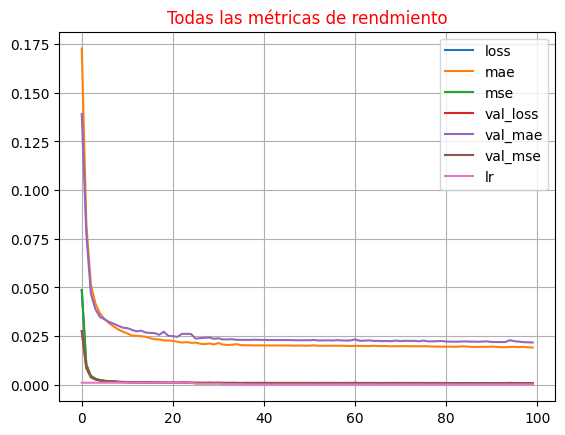

In [56]:
hpd = pd.DataFrame(history.history)
hpd.plot()
plt.title('Todas las métricas de rendmiento', c='r')
plt.grid(True)
plt.show()

### RNN

In [57]:
model_RNN = keras.models.Sequential([
                                     keras.layers.SimpleRNN(100, return_sequences=True, input_shape=[step_back,Ts1.shape[1]]),
                                     keras.layers.SimpleRNN(100, return_sequences=True),
                                     keras.layers.SimpleRNN(100, return_sequences=True),
                                     keras.layers.SimpleRNN(1)
])
model_RNN.summary()

# Training

metrics=['mae', 'mse']
model_RNN.compile(loss="mse", optimizer="adam", metrics=metrics)
history = model_RNN.fit(X_train1, Y_train1, epochs=N, batch_size=bsz, callbacks=callbacks, validation_split=0.2)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 12, 100)           12500     
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 12, 100)           20100     
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 12, 100)           20100     
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 1)                 102       
                                                                 
Total params: 52,802
Trainable params: 52,802
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 6s 68ms/step - loss: 0.0748 - mae: 0.2052 - mse: 0.0748 - val_loss: 0.0098 - val_mae: 0.0803 - val_mse: 0.0098 - lr: 0.0010
Epoch

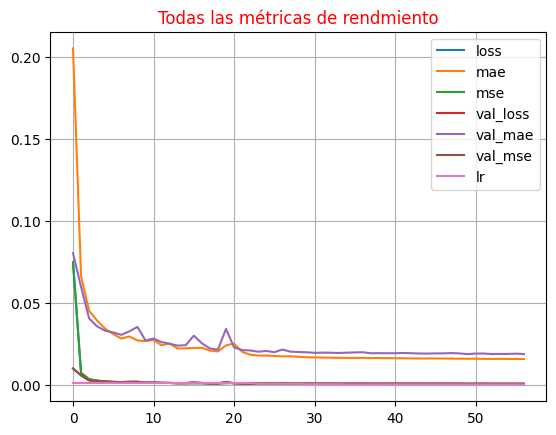

In [58]:
hpd = pd.DataFrame(history.history)
hpd.plot()
plt.title('Todas las métricas de rendmiento', c='r')
plt.grid(True)
plt.show()

# Rendimiento

124/124 [==============================] - 0s 3ms/step


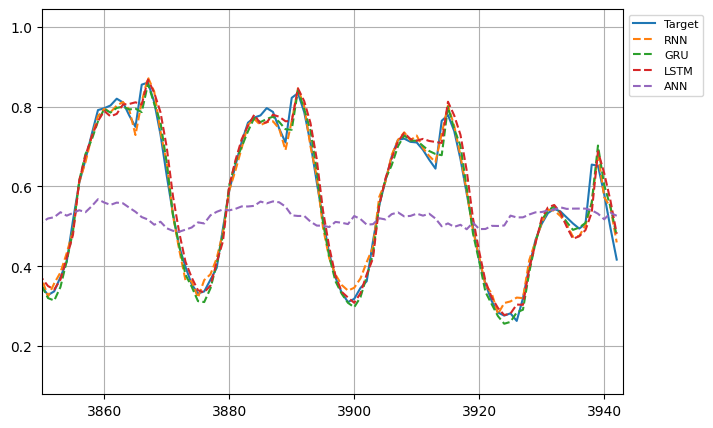

╒═════════════╤═════════════╤═════════════╤═════════════╤═══════════════╕
│ Metrics     │         RNN │         GRU │        LSTM │           ANN │
╞═════════════╪═════════════╪═════════════╪═════════════╪═══════════════╡
│ MSE         │ 0.02745     │ 0.0309      │ 0.03543     │  0.21759      │
├─────────────┼─────────────┼─────────────┼─────────────┼───────────────┤
│ RMSE        │ 0.000753538 │ 0.000954863 │ 0.00125501  │  0.0473473    │
├─────────────┼─────────────┼─────────────┼─────────────┼───────────────┤
│ MAE         │ 0.02176     │ 0.02363     │ 0.02824     │  0.1856       │
├─────────────┼─────────────┼─────────────┼─────────────┼───────────────┤
│ R2          │ 0.98132     │ 0.97632     │ 0.96888     │ -0.17403      │
├─────────────┼─────────────┼─────────────┼─────────────┼───────────────┤
│ cnSMAPE     │ 0.96125     │ 0.96084     │ 0.95186     │  0.69501      │
├─────────────┼─────────────┼─────────────┼─────────────┼───────────────┤
│ P_Value_PS  │ 0           │ 0       

In [59]:
forecasting_RNN  = model_RNN.predict(X_test1)
forecasting_GRU  = model_GRU.predict(X_test1)
forecasting_LSTM = model_LSTM.predict(X_test1)
forecasting_ANN = model_ANN.predict(X_test1)

forecasting_DL2 = [forecasting_RNN, forecasting_GRU, forecasting_LSTM, forecasting_ANN[:,0,0]]
model_names_DL = ['RNN', 'GRU', 'LSTM','ANN']

plt.figure(figsize=(7.5,5))
plt.plot(Y_test1, label='Target')
for i in range(len(forecasting_DL2)):
  plt.plot(forecasting_DL2[i], label=model_names_DL[i], linestyle='--')
plt.xlim(3850,len(forecasting_DL2[i])) # 3850
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='8')
plt.grid()
plt.show()

col_names, MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var = ['Metrics','RNN', 'GRU', 'LSTM','ANN'], ["MSE"], ["RMSE"], ["MAE"], ["R2"],['cnSMAPE'],['P_Value_PS'],['P_Value_TT'], ['P_Value_Var']
for k in range(4):
  MSE.append(round(mean_squared_error(Y_test1, forecasting_DL2[k], squared=False),5))
  RMSE.append(mean_squared_error(Y_test1, forecasting_DL2[k], squared=True))
  MAE.append(round(mean_absolute_error(Y_test1, forecasting_DL2[k]),5))
  R2.append(round(r2_score(Y_test1, forecasting_DL2[k]),5))
  mape=mean_absolute_percentage_error(Y_test1, forecasting_DL2[k])
  smape = 2 * mape * 100 / (100 - mape)
  cnSMAPE.append(round(1-(smape/2),5))
  correlation, p_value = stats.pearsonr(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
  P_Value_PS.append(p_value)
  correlation, p_value = stats.ttest_ind(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
  P_Value_TT.append(p_value)
  statistic, p_value3 = bartlett(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
  P_Value_Var.append(p_value3)

tablas = [MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var]

print(tabulate(tablas, headers=col_names, tablefmt="fancy_grid"))




124/124 [==============================] - 0s 3ms/step


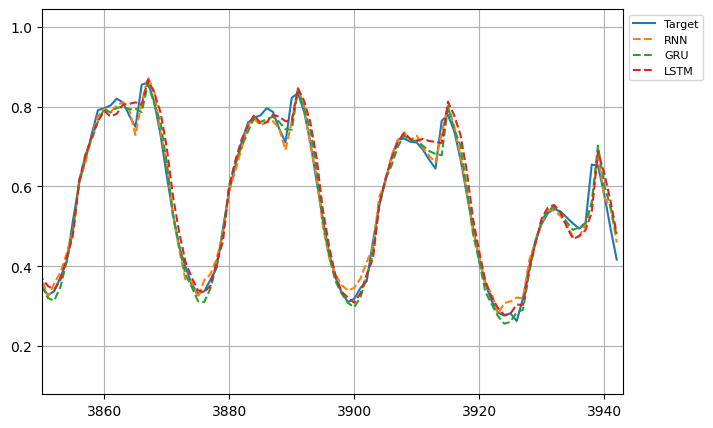

╒═════════════╤═════════════╤═════════════╤═════════════╕
│ Metrics     │         RNN │         GRU │        LSTM │
╞═════════════╪═════════════╪═════════════╪═════════════╡
│ MSE         │ 0.02745     │ 0.0309      │ 0.03543     │
├─────────────┼─────────────┼─────────────┼─────────────┤
│ RMSE        │ 0.000753538 │ 0.000954863 │ 0.00125501  │
├─────────────┼─────────────┼─────────────┼─────────────┤
│ MAE         │ 0.02176     │ 0.02363     │ 0.02824     │
├─────────────┼─────────────┼─────────────┼─────────────┤
│ R2          │ 0.98132     │ 0.97632     │ 0.96888     │
├─────────────┼─────────────┼─────────────┼─────────────┤
│ cnSMAPE     │ 0.96125     │ 0.96084     │ 0.95186     │
├─────────────┼─────────────┼─────────────┼─────────────┤
│ P_Value_PS  │ 0           │ 0           │ 0           │
├─────────────┼─────────────┼─────────────┼─────────────┤
│ P_Value_TT  │ 0.446766    │ 0.483336    │ 0.653719    │
├─────────────┼─────────────┼─────────────┼─────────────┤
│ P_Value_Var 

In [60]:
forecasting_RNN  = model_RNN.predict(X_test1)
forecasting_GRU  = model_GRU.predict(X_test1)
forecasting_LSTM = model_LSTM.predict(X_test1)

forecasting_DL2 = [forecasting_RNN, forecasting_GRU, forecasting_LSTM]
model_names_DL = ['RNN', 'GRU', 'LSTM']

plt.figure(figsize=(7.5,5))
plt.plot(Y_test1, label='Target')
for i in range(len(forecasting_DL2)):
  plt.plot(forecasting_DL2[i], label=model_names_DL[i], linestyle='--')
plt.xlim(3850,len(forecasting_DL2[i])) # 3850
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='8')
plt.grid()
plt.show()

col_names, MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var = ['Metrics','RNN', 'GRU', 'LSTM'], ["MSE"], ["RMSE"], ["MAE"], ["R2"],['cnSMAPE'],['P_Value_PS'],['P_Value_TT'], ['P_Value_Var']
for k in range(3):
  MSE.append(round(mean_squared_error(Y_test1, forecasting_DL2[k], squared=False),5))
  RMSE.append(mean_squared_error(Y_test1, forecasting_DL2[k], squared=True))
  MAE.append(round(mean_absolute_error(Y_test1, forecasting_DL2[k]),5))
  R2.append(round(r2_score(Y_test1, forecasting_DL2[k]),5))
  mape=mean_absolute_percentage_error(Y_test1, forecasting_DL2[k])
  smape = 2 * mape * 100 / (100 - mape)
  cnSMAPE.append(round(1-(smape/2),5))
  correlation, p_value = stats.pearsonr(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
  P_Value_PS.append(p_value)
  correlation, p_value = stats.ttest_ind(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
  P_Value_TT.append(p_value)
  statistic, p_value3 = bartlett(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
  P_Value_Var.append(p_value3)

tablas = [MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var]

print(tabulate(tablas, headers=col_names, tablefmt="fancy_grid"))



In [61]:
tablas=pd.DataFrame(tablas)
tablas.to_excel("/content/DL_M_12.xlsx")
files.download("/content/DL_M_12.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# TimeStep =18

### Conjunto de Entrenamiento


In [62]:
#  Particion X,Y y Time_step/step_back/window
step_back = 18

X1, Y1 = TrainingSets(data = Ts1, dataξ = out,step_back=step_back)


#  Particion Train_Test

Part = 0.8

# Serie 1
X_test1 = X1[int(len(X1)*0.8):]
X_train1 = X1[:int(len(X1)*0.8)]
# X_test1=X_test1[:,0,:]
# X_train1=X_train1[:,0,:]

Y_test1 = Y1[int(len(Y1)*0.8):]
Y_train1 = Y1[:int(len(Y1)*0.8)]
# Y_test1=Y_test1[:,0]
# Y_train1=Y_train1[:,0]

### LSTM

In [63]:
model_LSTM = keras.models.Sequential([
                                     keras.layers.LSTM(100, return_sequences=True, input_shape=[step_back,Ts1.shape[1]]),
                                     keras.layers.LSTM(100, return_sequences=True),
                                     keras.layers.LSTM(100, return_sequences=True),
                                     keras.layers.LSTM(1)
])
model_LSTM.summary()

# Training

model_LSTM.compile(loss="mse", optimizer="adam", metrics=['mae', 'mse'])
history = model_LSTM.fit(X_train1, Y_train1, epochs=N, batch_size=bsz, callbacks=callbacks, validation_split=0.2)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 18, 100)           50000     
                                                                 
 lstm_13 (LSTM)              (None, 18, 100)           80400     
                                                                 
 lstm_14 (LSTM)              (None, 18, 100)           80400     
                                                                 
 lstm_15 (LSTM)              (None, 1)                 408       
                                                                 
Total params: 211,208
Trainable params: 211,208
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 8s 68ms/step - loss: 0.0573 - mae: 0.1994 - mse: 0.0573 - val_loss: 0.0395 - val_mae: 0.1751 - val_mse: 0.0395 - lr: 0.0010
Epo

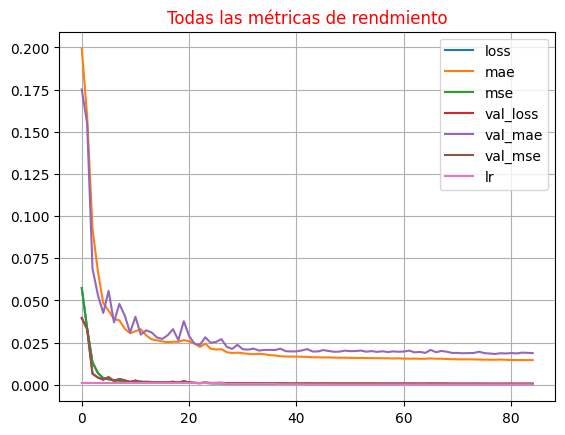

In [64]:
hpd = pd.DataFrame(history.history)
hpd.plot()
plt.title('Todas las métricas de rendmiento', c='r')
plt.grid(True)
plt.show()

### ANN

In [65]:
model_ANN = keras.models.Sequential([
                                     keras.layers.Dense(100, input_shape=(step_back,Ts1.shape[1],)),
                                     keras.layers.Dense(100),
                                     keras.layers.Dense(100),
                                     keras.layers.Dense(1)
])
model_ANN.summary()

# Training

model_ANN.compile(loss="mse", optimizer="adam", metrics=['mae', 'mse'])
history = model_ANN.fit(X_train1, Y_train1, epochs=N, batch_size=bsz,callbacks=callbacks, validation_split=0.2) #

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 18, 100)           2500      
                                                                 
 dense_9 (Dense)             (None, 18, 100)           10100     
                                                                 
 dense_10 (Dense)            (None, 18, 100)           10100     
                                                                 
 dense_11 (Dense)            (None, 18, 1)             101       
                                                                 
Total params: 22,801
Trainable params: 22,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 2s 15ms/step - loss: 0.0923 - mae: 0.2454 - mse: 0.0923 - val_loss: 0.0433 - val_mae: 0.1786 - val_mse: 0.0433 - lr: 0.0010
Epoc

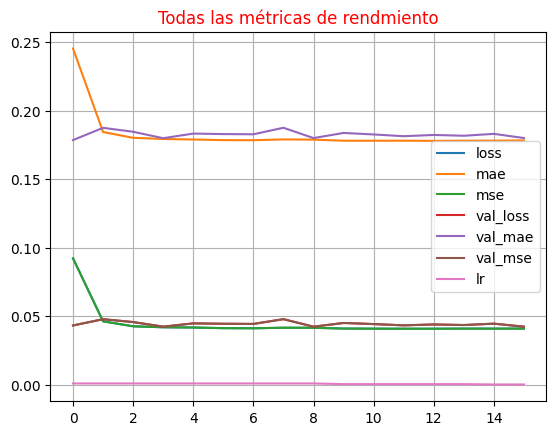

In [66]:
hpd = pd.DataFrame(history.history)
hpd.plot()
plt.title('Todas las métricas de rendmiento', c='r')
plt.grid(True)
plt.show()

### GRU

In [67]:
model_GRU = keras.models.Sequential([
                                     keras.layers.GRU(100, return_sequences=True, input_shape=[step_back,Ts1.shape[1]]),
                                     keras.layers.GRU(100, return_sequences=True),
                                     keras.layers.GRU(100, return_sequences=True),
                                     keras.layers.GRU(1)
])
model_GRU.summary()

# Training
metrics=['mae', 'mse']

model_GRU.compile(loss="mse", optimizer="adam", metrics=metrics)
history = model_GRU.fit(X_train1, Y_train1, epochs=N, batch_size=bsz, callbacks=callbacks, validation_split=0.2)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_8 (GRU)                 (None, 18, 100)           37800     
                                                                 
 gru_9 (GRU)                 (None, 18, 100)           60600     
                                                                 
 gru_10 (GRU)                (None, 18, 100)           60600     
                                                                 
 gru_11 (GRU)                (None, 1)                 309       
                                                                 
Total params: 159,309
Trainable params: 159,309
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 8s 60ms/step - loss: 0.0608 - mae: 0.1914 - mse: 0.0608 - val_loss: 0.0215 - val_mae: 0.1306 - val_mse: 0.0215 - lr: 0.0010
Ep

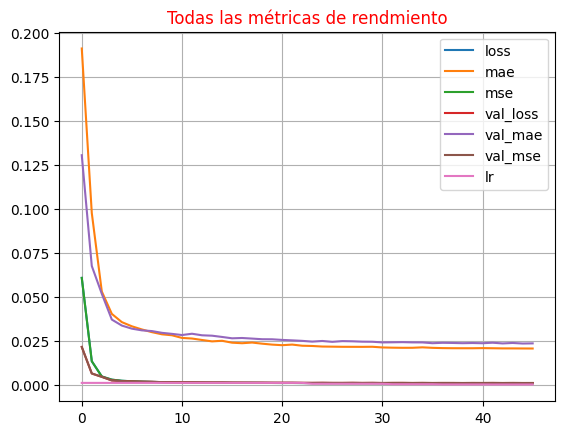

In [68]:
hpd = pd.DataFrame(history.history)
hpd.plot()
plt.title('Todas las métricas de rendmiento', c='r')
plt.grid(True)
plt.show()

### RNN

In [69]:
model_RNN = keras.models.Sequential([
                                     keras.layers.SimpleRNN(100, return_sequences=True, input_shape=[step_back,Ts1.shape[1]]),
                                     keras.layers.SimpleRNN(100, return_sequences=True),
                                     keras.layers.SimpleRNN(100, return_sequences=True),
                                     keras.layers.SimpleRNN(1)
])
model_RNN.summary()

# Training

metrics=['mae', 'mse']
model_RNN.compile(loss="mse", optimizer="adam", metrics=metrics)
history = model_RNN.fit(X_train1, Y_train1, epochs=N, batch_size=bsz, callbacks=callbacks, validation_split=0.2)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_8 (SimpleRNN)    (None, 18, 100)           12500     
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 18, 100)           20100     
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, 18, 100)           20100     
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 1)                 102       
                                                                 
Total params: 52,802
Trainable params: 52,802
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 6s 90ms/step - loss: 0.0191 - mae: 0.1021 - mse: 0.0191 - val_loss: 0.0072 - val_mae: 0.0707 - val_mse: 0.0072 - lr: 0.0010
Epoc

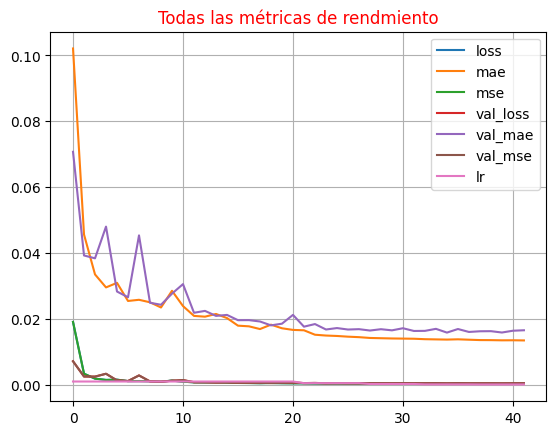

In [70]:
hpd = pd.DataFrame(history.history)
hpd.plot()
plt.title('Todas las métricas de rendmiento', c='r')
plt.grid(True)
plt.show()

# Rendimiento

124/124 [==============================] - 0s 2ms/step


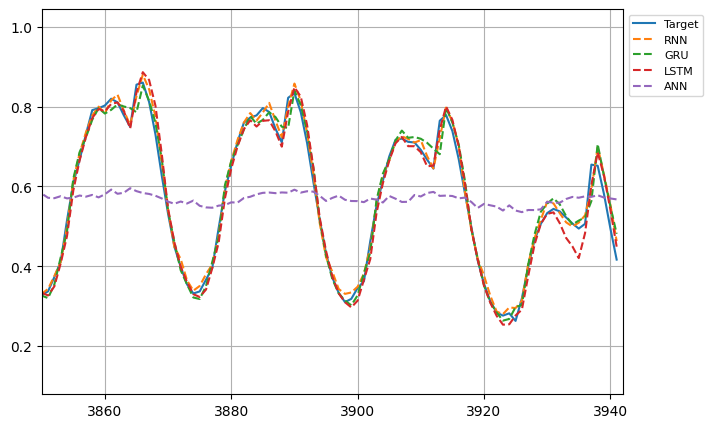

╒═════════════╤═════════════╤═════════════╤═════════════╤═══════════════╕
│ Metrics     │         RNN │         GRU │        LSTM │           ANN │
╞═════════════╪═════════════╪═════════════╪═════════════╪═══════════════╡
│ MSE         │ 0.02305     │ 0.03315     │ 0.02587     │  0.20722      │
├─────────────┼─────────────┼─────────────┼─────────────┼───────────────┤
│ RMSE        │ 0.000531158 │ 0.00109878  │ 0.000669317 │  0.0429392    │
├─────────────┼─────────────┼─────────────┼─────────────┼───────────────┤
│ MAE         │ 0.01802     │ 0.02542     │ 0.01992     │  0.18106      │
├─────────────┼─────────────┼─────────────┼─────────────┼───────────────┤
│ R2          │ 0.98683     │ 0.97276     │ 0.98341     │ -0.06446      │
├─────────────┼─────────────┼─────────────┼─────────────┼───────────────┤
│ cnSMAPE     │ 0.96884     │ 0.95789     │ 0.96596     │  0.6837       │
├─────────────┼─────────────┼─────────────┼─────────────┼───────────────┤
│ P_Value_PS  │ 0           │ 0       

In [71]:
forecasting_RNN  = model_RNN.predict(X_test1)
forecasting_GRU  = model_GRU.predict(X_test1)
forecasting_LSTM = model_LSTM.predict(X_test1)
forecasting_ANN = model_ANN.predict(X_test1)

forecasting_DL2 = [forecasting_RNN, forecasting_GRU, forecasting_LSTM,forecasting_ANN[:,0,0]]
model_names_DL = ['RNN', 'GRU', 'LSTM','ANN']

plt.figure(figsize=(7.5,5))
plt.plot(Y_test1, label='Target')
for i in range(len(forecasting_DL2)):
  plt.plot(forecasting_DL2[i], label=model_names_DL[i], linestyle='--')
plt.xlim(3850,len(forecasting_DL2[i])) # 3850
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='8')
plt.grid()
plt.show()

col_names, MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var = ['Metrics','RNN', 'GRU', 'LSTM','ANN'], ["MSE"], ["RMSE"], ["MAE"], ["R2"],['cnSMAPE'],['P_Value_PS'],['P_Value_TT'], ['P_Value_Var']
for k in range(4):
  MSE.append(round(mean_squared_error(Y_test1, forecasting_DL2[k], squared=False),5))
  RMSE.append(mean_squared_error(Y_test1, forecasting_DL2[k], squared=True))
  MAE.append(round(mean_absolute_error(Y_test1, forecasting_DL2[k]),5))
  R2.append(round(r2_score(Y_test1, forecasting_DL2[k]),5))
  mape=mean_absolute_percentage_error(Y_test1, forecasting_DL2[k])
  smape = 2 * mape * 100 / (100 - mape)
  cnSMAPE.append(round(1-(smape/2),5))
  correlation, p_value = stats.pearsonr(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
  P_Value_PS.append(p_value)
  correlation, p_value = stats.ttest_ind(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
  P_Value_TT.append(p_value)
  statistic, p_value3 = bartlett(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
  P_Value_Var.append(p_value3)

tablas = [MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var]

print(tabulate(tablas, headers=col_names, tablefmt="fancy_grid"))




124/124 [==============================] - 0s 4ms/step


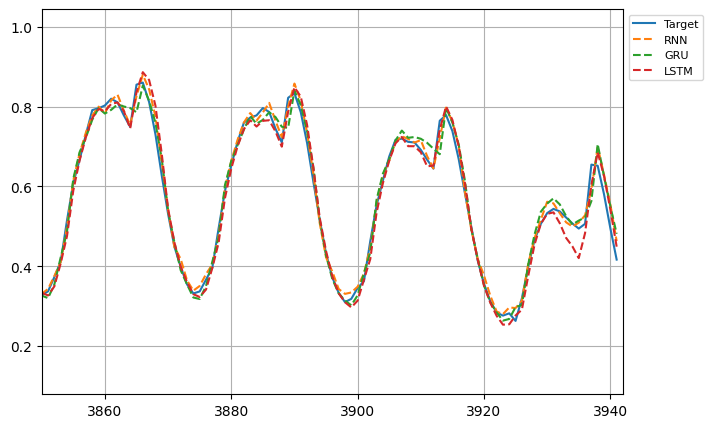

╒═════════════╤═════════════╤═════════════╤═════════════╕
│ Metrics     │         RNN │         GRU │        LSTM │
╞═════════════╪═════════════╪═════════════╪═════════════╡
│ MSE         │ 0.02305     │ 0.03315     │ 0.02587     │
├─────────────┼─────────────┼─────────────┼─────────────┤
│ RMSE        │ 0.000531158 │ 0.00109878  │ 0.000669317 │
├─────────────┼─────────────┼─────────────┼─────────────┤
│ MAE         │ 0.01802     │ 0.02542     │ 0.01992     │
├─────────────┼─────────────┼─────────────┼─────────────┤
│ R2          │ 0.98683     │ 0.97276     │ 0.98341     │
├─────────────┼─────────────┼─────────────┼─────────────┤
│ cnSMAPE     │ 0.96884     │ 0.95789     │ 0.96596     │
├─────────────┼─────────────┼─────────────┼─────────────┤
│ P_Value_PS  │ 0           │ 0           │ 0           │
├─────────────┼─────────────┼─────────────┼─────────────┤
│ P_Value_TT  │ 0.819662    │ 0.366287    │ 0.537171    │
├─────────────┼─────────────┼─────────────┼─────────────┤
│ P_Value_Var 

In [72]:
forecasting_RNN  = model_RNN.predict(X_test1)
forecasting_GRU  = model_GRU.predict(X_test1)
forecasting_LSTM = model_LSTM.predict(X_test1)

forecasting_DL2 = [forecasting_RNN, forecasting_GRU, forecasting_LSTM]
model_names_DL = ['RNN', 'GRU', 'LSTM']

plt.figure(figsize=(7.5,5))
plt.plot(Y_test1, label='Target')
for i in range(len(forecasting_DL2)):
  plt.plot(forecasting_DL2[i], label=model_names_DL[i], linestyle='--')
plt.xlim(3850,len(forecasting_DL2[i])) # 3850
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='8')
plt.grid()
plt.show()

col_names, MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var = ['Metrics','RNN', 'GRU', 'LSTM'], ["MSE"], ["RMSE"], ["MAE"], ["R2"],['cnSMAPE'],['P_Value_PS'],['P_Value_TT'], ['P_Value_Var']
for k in range(3):
  MSE.append(round(mean_squared_error(Y_test1, forecasting_DL2[k], squared=False),5))
  RMSE.append(mean_squared_error(Y_test1, forecasting_DL2[k], squared=True))
  MAE.append(round(mean_absolute_error(Y_test1, forecasting_DL2[k]),5))
  R2.append(round(r2_score(Y_test1, forecasting_DL2[k]),5))
  mape=mean_absolute_percentage_error(Y_test1, forecasting_DL2[k])
  smape = 2 * mape * 100 / (100 - mape)
  cnSMAPE.append(round(1-(smape/2),5))
  correlation, p_value = stats.pearsonr(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
  P_Value_PS.append(p_value)
  correlation, p_value = stats.ttest_ind(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
  P_Value_TT.append(p_value)
  statistic, p_value3 = bartlett(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
  P_Value_Var.append(p_value3)

tablas = [MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var]

print(tabulate(tablas, headers=col_names, tablefmt="fancy_grid"))



In [73]:
tablas=pd.DataFrame(tablas)
tablas.to_excel("/content/DL_M_18.xlsx")
files.download("/content/DL_M_18.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# tiempo

In [74]:
fin = time.time()

# Calcula el tiempo transcurrido
tiempo_transcurrido = fin - inicio
print("Tiempo transcurrido: ", tiempo_transcurrido, "segundos")

Tiempo transcurrido:  1614.6369969844818 segundos
